Set to analyze fraud transaction on bank

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import collections
import warnings

In [2]:
# menghapus warning di output
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('fraud_data.csv')
df

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
0,04-01-2019 00:58,"""Stokes, Christiansen and Sipes""",grocery_net,14.37,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a3806e984cec6ac0096d8184c64ad3a1,65.654142,-164.722603,1
1,04-01-2019 15:06,Predovic Inc,shopping_net,966.11,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a59185fe1b9ccf21323f581d7477573f,65.468863,-165.473127,1
2,04-01-2019 22:37,Wisozk and Sons,misc_pos,49.61,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,86ba3a888b42cd3925881fa34177b4e0,65.347667,-165.914542,1
3,04-01-2019 23:06,Murray-Smitham,grocery_pos,295.26,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,3a068fe1d856f0ecedbed33e4b5f4496,64.445035,-166.080207,1
4,04-01-2019 23:59,Friesen Lt,health_fitness,18.17,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,891cdd1191028759dc20dc224347a0ff,65.447094,-165.446843,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14441,22-01-2019 00:37,Hudson-Grady,shopping_pos,122.00,Athena,OR,45.8289,-118.4971,1302,Dealer,18-10-1976,699a4c06b22711bf3e0d8ef91232d356,46.442439,-118.524214,0
14442,22-01-2019 00:41,"""Nienow, Ankunding and Collie""",misc_pos,9.07,Gardiner,OR,43.7857,-124.1437,260,"""Engineer, maintenance""",01-09-1956,080d620d24815c7d6c637cf0b71dde8e,42.901265,-124.995317,0
14443,22-01-2019 00:42,Pacocha-O'Reilly,grocery_pos,104.84,Alva,WY,44.6873,-104.4414,110,"""Administrator, local government""",16-05-1973,3c346c8cd627c5fe3ed57430db2e9ae7,45.538062,-104.542117,0
14444,22-01-2019 00:48,"""Bins, Balistreri and Beatty""",shopping_pos,268.16,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,e66ffcc95ba7fc490486242af1205d04,64.081462,-165.898698,0


Data Analysis

In [76]:
# mengubah nama is_fraud menjadi fraud lalu menghapus kolom is_fraud
df['fraud'] = df['is_fraud']
df.drop('is_fraud', axis=1)

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,fraud
0,04-01-2019 00:58,"""Stokes, Christiansen and Sipes""",grocery_net,14.37,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a3806e984cec6ac0096d8184c64ad3a1,65.654142,-164.722603,1
1,04-01-2019 15:06,Predovic Inc,shopping_net,966.11,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a59185fe1b9ccf21323f581d7477573f,65.468863,-165.473127,1
2,04-01-2019 22:37,Wisozk and Sons,misc_pos,49.61,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,86ba3a888b42cd3925881fa34177b4e0,65.347667,-165.914542,1
3,04-01-2019 23:06,Murray-Smitham,grocery_pos,295.26,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,3a068fe1d856f0ecedbed33e4b5f4496,64.445035,-166.080207,1
4,04-01-2019 23:59,Friesen Lt,health_fitness,18.17,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,891cdd1191028759dc20dc224347a0ff,65.447094,-165.446843,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14441,22-01-2019 00:37,Hudson-Grady,shopping_pos,122.00,Athena,OR,45.8289,-118.4971,1302,Dealer,18-10-1976,699a4c06b22711bf3e0d8ef91232d356,46.442439,-118.524214,0
14442,22-01-2019 00:41,"""Nienow, Ankunding and Collie""",misc_pos,9.07,Gardiner,OR,43.7857,-124.1437,260,"""Engineer, maintenance""",01-09-1956,080d620d24815c7d6c637cf0b71dde8e,42.901265,-124.995317,0
14443,22-01-2019 00:42,Pacocha-O'Reilly,grocery_pos,104.84,Alva,WY,44.6873,-104.4414,110,"""Administrator, local government""",16-05-1973,3c346c8cd627c5fe3ed57430db2e9ae7,45.538062,-104.542117,0
14444,22-01-2019 00:48,"""Bins, Balistreri and Beatty""",shopping_pos,268.16,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,e66ffcc95ba7fc490486242af1205d04,64.081462,-165.898698,0


In [5]:
df_axis = df.drop({'trans_date_trans_time', 'merchant', 'category', 'city', 'state', 'job', 'dob', 'trans_num', 'is_fraud'}, axis=1)
df_axis

,amt,lat,long,city_pop,merch_lat,merch_long,fraud
0,14.37,64.7556,-165.6723,145,65.654142,-164.722603,1
1,966.11,64.7556,-165.6723,145,65.468863,-165.473127,1
2,49.61,64.7556,-165.6723,145,65.347667,-165.914542,1
3,295.26,64.7556,-165.6723,145,64.445035,-166.080207,1
4,18.17,64.7556,-165.6723,145,65.447094,-165.446843,1
...,...,...,...,...,...,...,...
14441,122.00,45.8289,-118.4971,1302,46.442439,-118.524214,0
14442,9.07,43.7857,-124.1437,260,42.901265,-124.995317,0
14443,104.84,44.6873,-104.4414,110,45.538062,-104.542117,0
14444,268.16,64.7556,-165.6723,145,64.081462,-165.898698,0


In [6]:
df_axis.drop(df_axis[df_axis['fraud'] == '1"2020-12-24 16:56:24"'].index, inplace=True)
df_axis.drop(df_axis[df_axis['fraud'] == '0"2019-01-01 00:00:44"'].index, inplace=True)

In [7]:
df_axis['fraud'].value_counts()

fraud
0    12600
1     1844
Name: count, dtype: int64

In [8]:
df_axis['fraud'] = df_axis['fraud'].astype(float)
df_axis['city_pop'] = df_axis['city_pop'].astype(float)

* amt = amount transaction (Jumlah atau nilai transaksi dalam mata uang)
* lat = latitude (Koordinat lintang lokasi transaksi/pelanggan)
* long = longtitude (Koordinat bujur lokasi transaksi/pelanggan)
* city_pop = city population (Jumlah populasi kota tempat transaksi terjadi)
* merch_lat = merchant latitude (Analisis jarak antara lokasi pelanggan dan merchant/penjual)
* merch_long = merchant longitude (Bersama merchant latitude, membentuk lokasi merchant yang lengkap)
* fraud = fraud indicator (Target variable untuk model machine learning)

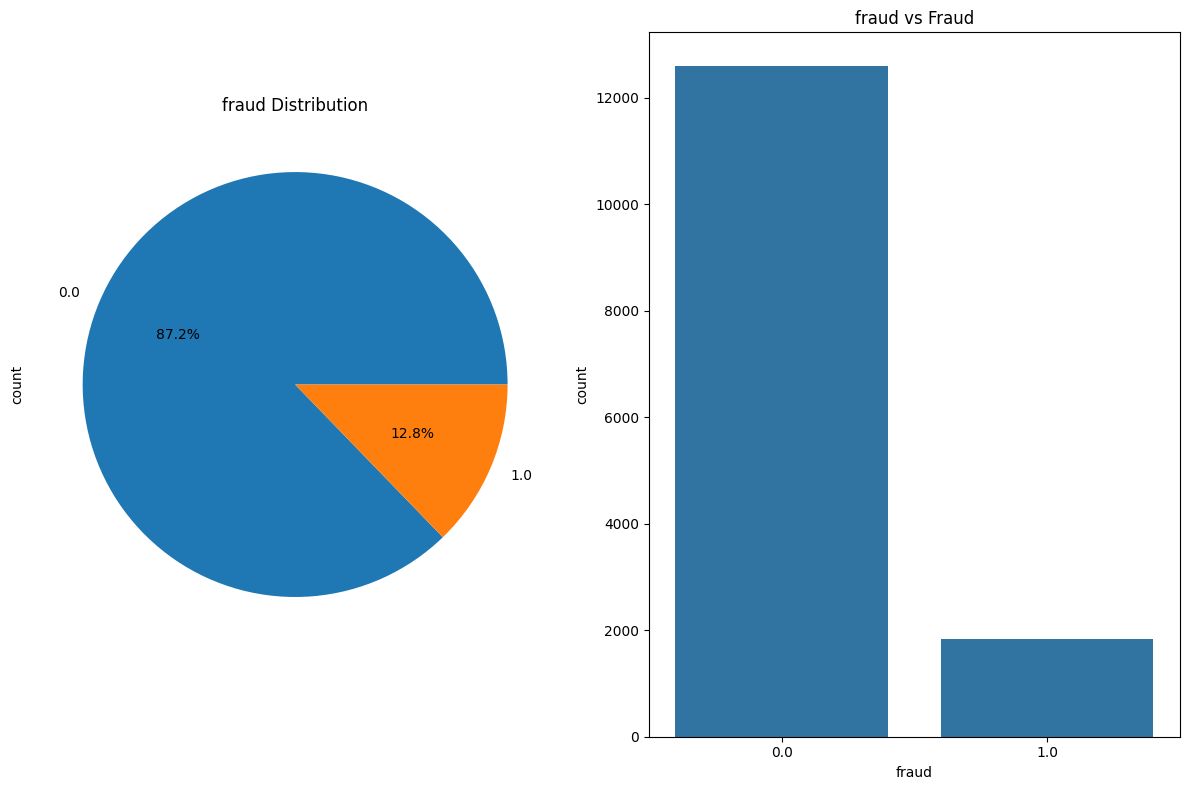

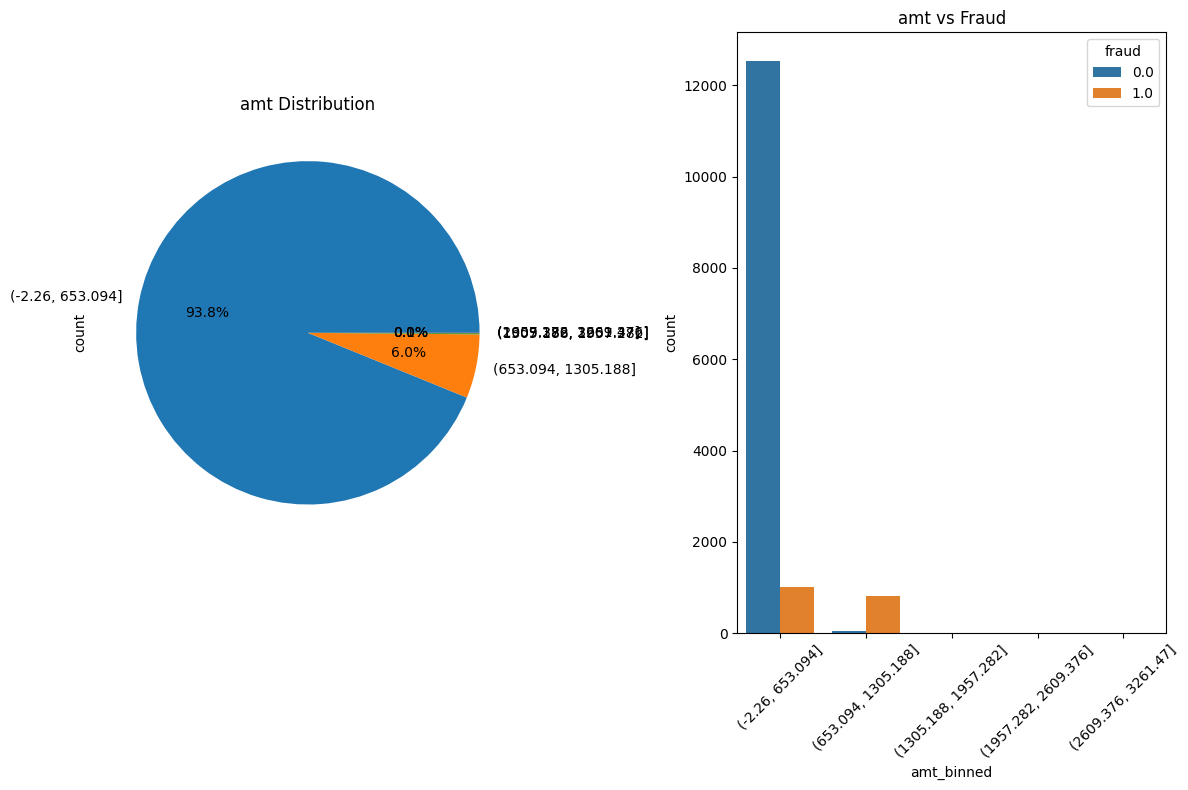

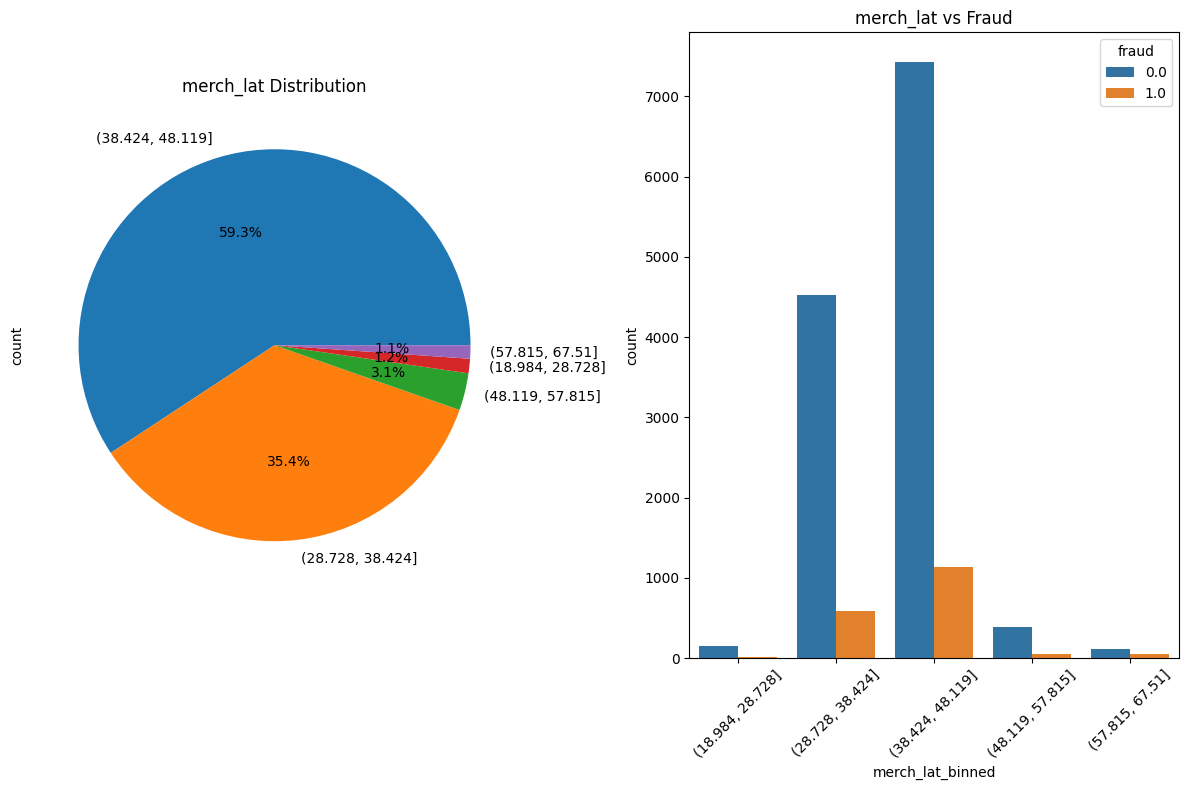

In [9]:
# Analisis fraud, amount, dan merchant latitude - Versi Singkat
fraud_category = ['fraud', 'amt', 'merch_lat']

for col in fraud_category:
    fig, axes = plt.subplots(1, 2, figsize=(12, 8))
    
    if col == 'fraud':
        df_axis[col].value_counts().plot(kind='pie', ax=axes[0], autopct='%1.1f%%')
        sns.countplot(x=col, data=df_axis, ax=axes[1])
    else:
        df_axis[f'{col}_binned'] = pd.cut(df_axis[col], bins=5) # binned/bins addalah Data numerik diubah menjadi 10 kategori (bin) agar bisa divisualisasikan seperti data kategorikal.
        df_axis[f'{col}_binned'].value_counts().plot(kind='pie', ax=axes[0], autopct='%1.1f%%')
        sns.countplot(x=f'{col}_binned', hue='fraud', data=df_axis, ax=axes[1])
        axes[1].tick_params(axis='x', rotation=45)
    
    axes[0].set_title(f'{col} Distribution')
    axes[1].set_title(f'{col} vs Fraud')
    plt.tight_layout()
    plt.show()

In [10]:
# hapus kolom amt_binned dan merch_lat_binned
df_axis = df_axis.drop(['amt_binned', 'merch_lat_binned'], axis=1)

In [11]:
df_axis['fraud'].value_counts()

fraud
0.0    12600
1.0     1844
Name: count, dtype: int64

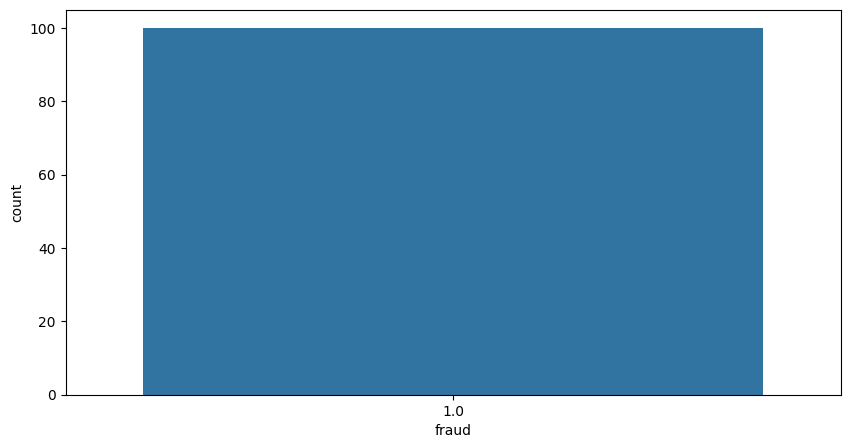

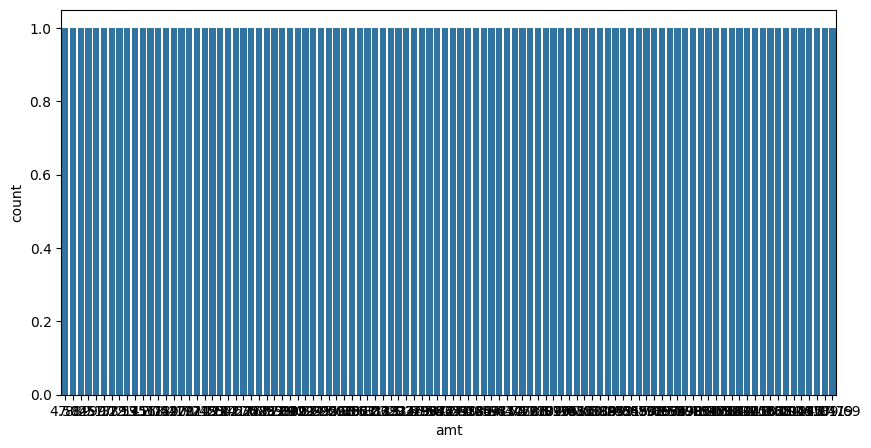

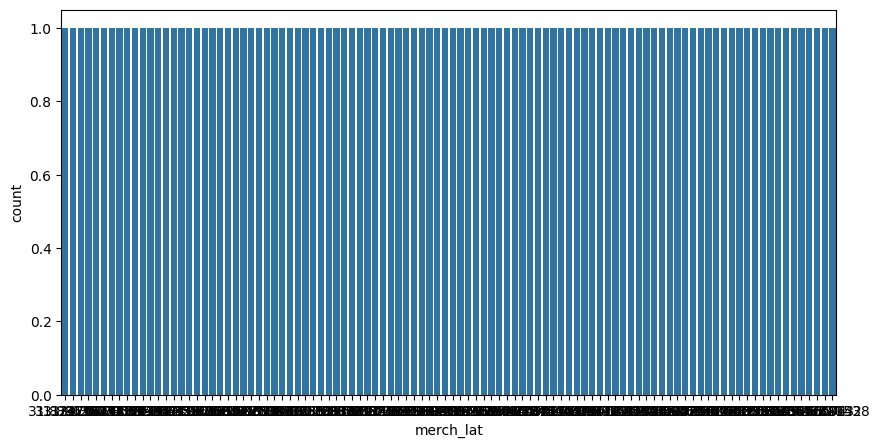

In [12]:
fraud_col = fraud_category
for col in fraud_col:
    plt.figure(figsize=(10, 5))
    sns.countplot(x = col, data = df_axis.head(100))

Text(0.5, 1.0, 'Class distributions \n (0: No Fraud) || 1: Fraud')

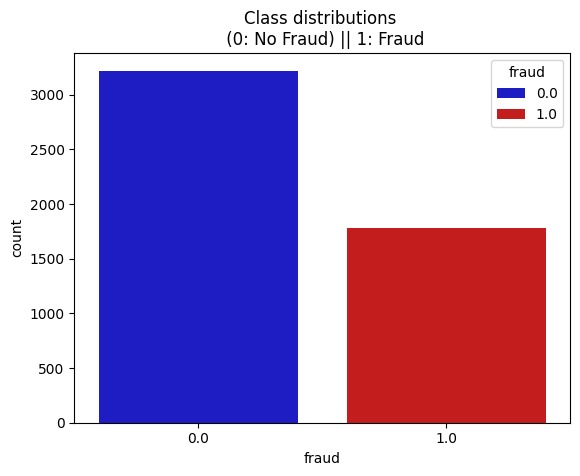

In [13]:
colors = ["#0101DF", "#DF0101"]
sns.countplot(x= 'fraud', data = df_axis.head(5000), palette=colors, hue='fraud')
plt.title('Class distributions \n (0: No Fraud) || 1: Fraud', fontsize=12)

In [14]:
# showing where the data fraud and no fraud
fraud_data = df_axis[df_axis['fraud'] == 1]
fraud_data

,amt,lat,long,city_pop,merch_lat,merch_long,fraud
0,14.37,64.7556,-165.6723,145.0,65.654142,-164.722603,1.0
1,966.11,64.7556,-165.6723,145.0,65.468863,-165.473127,1.0
2,49.61,64.7556,-165.6723,145.0,65.347667,-165.914542,1.0
3,295.26,64.7556,-165.6723,145.0,64.445035,-166.080207,1.0
4,18.17,64.7556,-165.6723,145.0,65.447094,-165.446843,1.0
...,...,...,...,...,...,...,...
13261,21.54,38.9999,-109.6150,46.0,38.211376,-109.986757,1.0
13372,528.98,38.9999,-109.6150,46.0,39.164469,-109.933543,1.0
13376,21.23,38.9999,-109.6150,46.0,38.998205,-110.005615,1.0
13392,9.33,38.9999,-109.6150,46.0,39.230640,-108.990363,1.0


In [15]:
nofraud_data = df_axis[df_axis['fraud'] == 0]
nofraud_data

,amt,lat,long,city_pop,merch_lat,merch_long,fraud
1782,440.56,39.7795,-93.3014,964.0,39.419072,-93.947900,0.0
1783,60.39,35.7206,-108.0271,5662.0,36.123857,-107.164356,0.0
1784,16.13,40.1362,-95.2138,1631.0,39.984044,-96.203203,0.0
1785,6.70,38.4549,-122.2564,94014.0,38.229234,-122.499378,0.0
1786,55.61,33.9143,-118.3493,93193.0,33.664630,-117.730522,0.0
...,...,...,...,...,...,...,...
14441,122.00,45.8289,-118.4971,1302.0,46.442439,-118.524214,0.0
14442,9.07,43.7857,-124.1437,260.0,42.901265,-124.995317,0.0
14443,104.84,44.6873,-104.4414,110.0,45.538062,-104.542117,0.0
14444,268.16,64.7556,-165.6723,145.0,64.081462,-165.898698,0.0


In [16]:
%whos

Variable         Type         Data/Info
---------------------------------------
axes             ndarray      2: 2 elems, type `object`, 16 bytes
col              str          merch_lat
collections      module       <module 'collections' fro<...>ollections\\__init__.py'>
colors           list         n=2
df               DataFrame          trans_date_trans_ti<...>[14446 rows x 16 columns]
df_axis          DataFrame              amt      lat   <...>n[14444 rows x 7 columns]
fig              Figure       Figure(1200x800)
fraud_category   list         n=3
fraud_col        list         n=3
fraud_data       DataFrame              amt      lat   <...>\n[1844 rows x 7 columns]
nofraud_data     DataFrame              amt      lat   <...>n[12600 rows x 7 columns]
np               module       <module 'numpy' from 'C:\<...>ges\\numpy\\__init__.py'>
pd               module       <module 'pandas' from 'C:<...>es\\pandas\\__init__.py'>
plt              module       <module 'matplotlib.pyplo<...>\\m

In [17]:
print('no fraud', round(df_axis['fraud'].value_counts()[0]/len(df_axis)*100, 2), '% of the dataset')
print('fraud', round(df_axis['fraud'].value_counts()[1]/len(df_axis)*100, 2), '% of the dataset')

no fraud 87.23 % of the dataset
fraud 12.77 % of the dataset


Splitting the Data

In [18]:
from sklearn.model_selection import  train_test_split, StratifiedShuffleSplit, StratifiedKFold

print('no fraud', round(df_axis['fraud'].value_counts()[0]/len(df_axis)*100, 2), '% of the dataset')
print('fraud', round(df_axis['fraud'].value_counts()[1]/len(df_axis)*100, 2), '% of the dataset')

X = df_axis.drop('fraud', axis=1)
y = df_axis['fraud']

X_train, y_train, X_test, y_test = train_test_split(X, y, random_state=42, test_size=0.2, stratify=y)

sss = StratifiedKFold(n_splits = 4, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# Turn into array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# see if both the train and test label distribution are similiary distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100) # pembatas

print('Label Distributions: \n')
print(train_counts_label/len(original_ytrain))
print(test_counts_label/len(original_ytest))

no fraud 87.23 % of the dataset
fraud 12.77 % of the dataset
Train: [  461   462   463 ... 14441 14442 14443] Test: [   0    1    2 ... 4928 4929 4930]
Train: [    0     1     2 ... 14441 14442 14443] Test: [ 461  462  463 ... 8078 8079 8080]
Train: [    0     1     2 ... 14441 14442 14443] Test: [  922   923   924 ... 11249 11250 11251]
Train: [    0     1     2 ... 11249 11250 11251] Test: [ 1383  1384  1385 ... 14441 14442 14443]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.87233453 0.12766547]
[0.87233453 0.12766547]


Correlation Matrices

Anomaly Detection

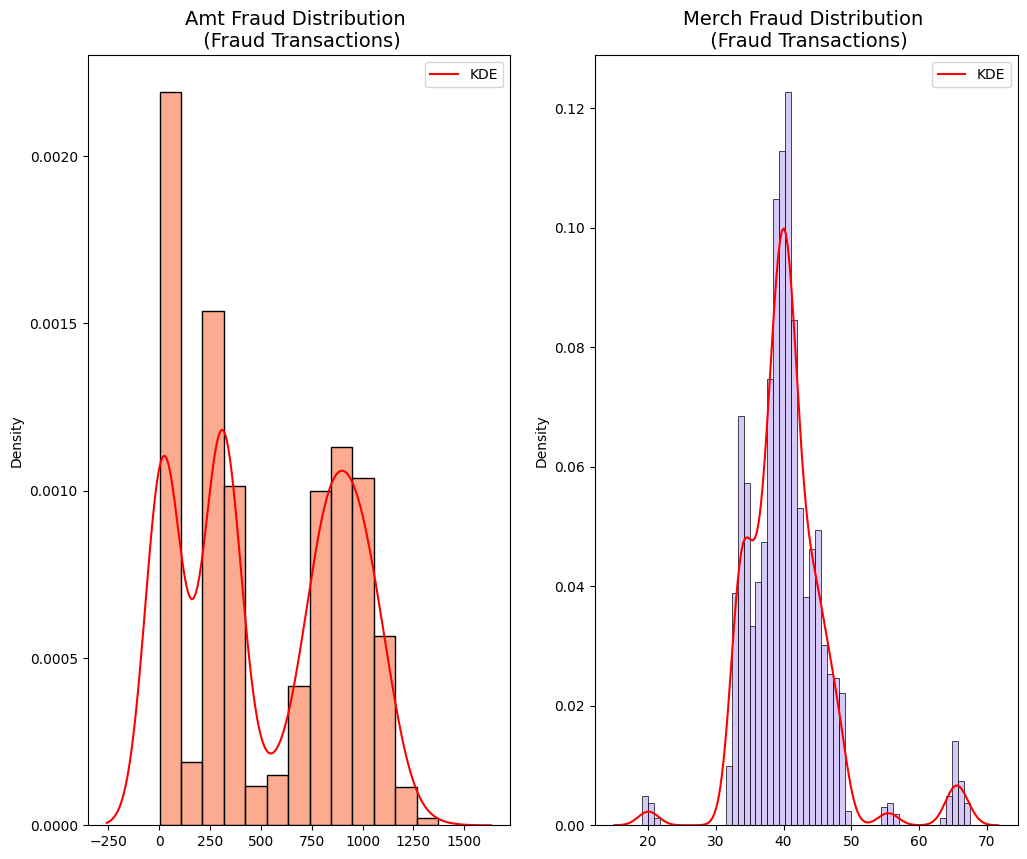

In [19]:
from scipy.stats import norm

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 10))

amt_fraud_dist = df_axis['amt'].loc[df_axis['fraud'] == 1].values
sns.histplot(amt_fraud_dist, ax=ax1, stat='density', alpha=0.7, color= '#FB8861')
sns.kdeplot(amt_fraud_dist, ax=ax1, color='red', label='KDE')
ax1.set_title('Amt Fraud Distribution \n (Fraud Transactions)', fontsize=14)

merch_fraud_dist = df_axis['merch_lat'].loc[df_axis['fraud'] == 1].values
sns.histplot(merch_fraud_dist, ax=ax2, stat='density', alpha=0.7, color='#C5B3F9')
sns.kdeplot(merch_fraud_dist, ax=ax2, color='red', label='KDE')
ax2.set_title('Merch Fraud Distribution \n (Fraud Transactions)', fontsize=14)

ax1.legend()
ax2.legend()
plt.show()

Classifiers (Undersampling)

Summary:
* Logistic Regression classifier is more accurate than the other three classifiers in most cases. (We will further analyze Logistic Regression)
* GridSearchCV is used to determine the paremeters that gives the best predictive score for the classifiers.
* Logistic Regression has the best Receiving Operating Characteristic score (ROC), meaning that LogisticRegression pretty accurately separates fraud and non-fraud transactions.

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Make a classifiers dictionary
classifiers = {
    'LogisticRegression': LogisticRegression(random_state=42),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'SVC': SVC(random_state=42),
    'DecisionTreeClassifier': DecisionTreeClassifier(random_state=42)
}

In [21]:
from sklearn.model_selection import train_test_split, cross_val_score

X = df_axis.drop(['fraud'], axis=1)
y = df_axis['fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=None, test_size=0.2, stratify=y)

for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print('Classifiers:', classifiers.__class__.__name__, 'Has a string score of',
          round(training_score.mean(), 2) * 100, '% accuracy score')

Classifiers: dict Has a string score of 92.0 % accuracy score
Classifiers: dict Has a string score of 94.0 % accuracy score
Classifiers: dict Has a string score of 87.0 % accuracy score
Classifiers: dict Has a string score of 92.0 % accuracy score


Logistic Regression Models

In [22]:
# Use GridsearchCV to find the best parameters
from sklearn.model_selection import GridSearchCV

# Logistic Regression
log_reg_params = {'penalty': ['l1', 'l2'],
                  'C': [0.01, 0.1, 1, 10, 100],
                  'solver': ['liblinear'],
                  'max_iter': [5000]
                  }

grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)

# find best estimator for logistic regression
log_reg = grid_log_reg.best_estimator_
log_reg


LogisticRegression(C=0.01, max_iter=5000, solver='liblinear')

KNeighborsClassifier Models

In [23]:
knear_params = {
    'n_neighbors': list(range(2, 5, 1)),
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

grid_knears = GridSearchCV(KNeighborsClassifier(), knear_params)
grid_knears.fit(X_train, y_train)

# find the best estimators for KNeighborsClassifier
knears_neighbors = grid_knears.best_estimator_
knears_neighbors

KNeighborsClassifier(n_neighbors=4)

Support Vector Classifier (SVC) Models

In [24]:
svc_params = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['poly', 'linear'],
    'max_iter': [15000],
    'tol': [1e-2]
}

grid_svc = GridSearchCV(SVC(), 
                        svc_params,
                        scoring='accuracy',
                        cv=5)

grid_svc.fit(X_train, y_train)

# find the best estimators for SVC
svc = grid_svc.best_estimator_
svc

SVC(C=0.1, kernel='poly', max_iter=15000, tol=0.01)

DecisionTree Classifier Models

In [25]:
DTC_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': list(range(2,4,1)),
    'min_samples_leaf': list(range(5,7,1))
}

grid_DTC = GridSearchCV(DecisionTreeClassifier(), DTC_params)
grid_DTC.fit(X_train, y_train)

# find the best estimators for DTC
DTC_clf = grid_DTC.best_estimator_
DTC_clf

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)

Overfitting case

In [26]:
log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
knears_neighbors_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
svc_score = cross_val_score(svc, X_train, y_train, cv=5)
DTC_score = cross_val_score(DTC_clf, X_train, y_train, cv=5)

print('Logistic Regression Cross Validation Score:', round(log_reg_score.mean() * 100, 2).astype(str) + '%')
print('KNeighbors Classifier Cross Validation Score:', round(knears_neighbors_score.mean() * 100, 2).astype(str) + '%')
print('SVC Cross Validation Score:', round(svc_score.mean() * 100, 2).astype(str) + '%')
print('DTC Cross Validation Score:', round(DTC_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score: 92.19%
KNeighbors Classifier Cross Validation Score: 94.44%
SVC Cross Validation Score: 87.23%
DTC Cross Validation Score: 94.94%


Plot LogisticRegression Learning Curve

In [27]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator1, estimator2, estimator3, estimator4, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)

    # First estimators
    train_sizes, train_scores, test_scores = learning_curve(
        estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color = '#2492ff')
    ax1.plot(train_sizes, train_scores_mean, 'o-', color='#ff9214', label='Training Score')
    ax1.plot(train_sizes, test_scores_mean, 'o-', color='#2492ff', label='Cross Validation Score')
    ax1.set_title('Logistic Regression Learning Curve', fontsize=14)
    ax1.set_xlabel('Training Size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc='best')
    
    # Second estimators
    train_sizes, train_scores, test_scores = learning_curve(
        estimator2, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax2.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color= '#2f92ff')
    ax2.plot(train_sizes, train_scores_mean, 'o-', color='#ff9214', label='Training Score')
    ax2.plot(train_sizes, train_scores_mean, 'o-', color='#2f92ff', label='Cross Validation Score')
    ax2.set_title('KNears Neighbors Learning Curve', fontsize=14)
    ax2.set_xlabel('Training Size (m)')
    ax2.set_ylabel('Score')
    ax2.grid(True)
    ax2.legend(loc='best')

    # Third estimators
    train_sizes, train_scores, test_scores = learning_curve(
        estimator3, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax3.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color= '#2f92ff')
    ax3.plot(train_sizes, train_scores_mean, 'o-', color='#ff9214', label='Training Score')
    ax3.plot(train_sizes, train_scores_mean, 'o-', color='#2f92ff', label='Cross Validation Score')
    ax3.set_title('SVC Learning Curve', fontsize=14)
    ax3.set_xlabel('Training Size (m)')
    ax3.set_ylabel('Score')
    ax3.grid(True)
    ax3.legend(loc='best')

    # Fourth estimators
    train_sizes, train_scores, test_scores = learning_curve(
        estimator4, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax4.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color= '#2f92ff')
    ax4.plot(train_sizes, train_scores_mean, 'o-', color='#ff9214', label='Training Score')
    ax4.plot(train_sizes, train_scores_mean, 'o-', color='#2f92ff', label='Cross Validation Score')
    ax4.set_title('DecisionTree Classifier Learning Curve', fontsize=14)
    ax4.set_xlabel('Training Size (m)')
    ax4.set_ylabel('Score')
    ax4.grid(True)
    ax4.legend(loc='best')
    return plt


In [67]:
# membuat plot (disarankan stabilkan model dulu baru fokus ke membuat plot nya)
# cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
# plot_learning_curve(log_reg, knears_neighbors, svc, DTC_clf, X_train, y_train, (0.87, 1.01), cv=cv, n_jobs=4)

In [29]:
# into checking models on roc auc score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict

# Create a DataFrame with all the scores and the classifiers names.

log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5, method='decision_function')
knears_pred = cross_val_predict(knears_neighbors, X_train, y_train, cv=5)
svc_pred = cross_val_predict(svc, X_train, y_train, cv=5, method='decision_function')
DTC_pred = cross_val_predict(DTC_clf, X_train, y_train, cv=5)

print('Logistic Regression:', roc_auc_score(y_train, log_reg_pred))
print('KNears Neighbors:', roc_auc_score(y_train, knears_pred))
print('Support Vector Classifier:', roc_auc_score(y_train, svc_pred))
print('Decision Tree Classifier:', roc_auc_score(y_train, DTC_pred))

Logistic Regression: 0.8273806160882433
KNears Neighbors: 0.8168090866290019
Support Vector Classifier: 0.5340274414850686
Decision Tree Classifier: 0.8364205004035512


Built Predict Score

In [30]:
# Logistic Regression preds models

# train & test class preds logistic regression
train_class_preds_log_reg = log_reg.predict(X_train)
test_class_preds_log_reg = log_reg.predict(X_test)

# train & test class preds KNeighborsclassifer
train_class_preds_KNears = knears_neighbors.predict(X_train)
test_class_preds_KNears = knears_neighbors.predict(X_test)

# train & test class preds SVC
train_class_preds_SVC = svc.predict(X_train)
test_class_preds_SVC = svc.predict(X_test)

# train & test class preds DecisionTreeClassifier
train_class_preds_DTC = DTC_clf.predict(X_train)
test_class_preds_DTC = DTC_clf.predict(X_test)

print('result of train class preds log reg is:', (train_class_preds_log_reg))
print('result of test class preds log reg is:', (test_class_preds_log_reg))
print('-' * 100)
print('result of train class preds knears is:', (train_class_preds_KNears))
print('result of test class preds knears is:', (test_class_preds_KNears))
print('-' * 100)
print('result of train class preds svc is:', (train_class_preds_SVC))
print('result of test class preds svc is:', (test_class_preds_SVC))
print('-' * 100)
print('result of train class preds DTC is:', (train_class_preds_DTC))
print('result of test class preds DTC is:', (test_class_preds_DTC))

result of train class preds log reg is: [0. 0. 0. ... 0. 0. 0.]
result of test class preds log reg is: [0. 0. 0. ... 0. 0. 0.]
----------------------------------------------------------------------------------------------------
result of train class preds knears is: [0. 0. 0. ... 0. 0. 0.]
result of test class preds knears is: [0. 0. 0. ... 0. 0. 0.]
----------------------------------------------------------------------------------------------------
result of train class preds svc is: [0. 0. 0. ... 0. 0. 0.]
result of test class preds svc is: [0. 0. 0. ... 0. 0. 0.]
----------------------------------------------------------------------------------------------------
result of train class preds DTC is: [0. 0. 0. ... 0. 0. 0.]
result of test class preds DTC is: [0. 0. 0. ... 0. 0. 0.]


In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [32]:
# metrics for logistic regression
test_accuracy_log = accuracy_score(test_class_preds_log_reg, y_test)
test_precision_log = precision_score(test_class_preds_log_reg, y_test)
test_recall_log = recall_score(test_class_preds_log_reg, y_test)
test_f1_log = f1_score(test_class_preds_log_reg, y_test)
test_roc_auc_log = roc_auc_score(test_class_preds_log_reg, y_test)

# metrics for KNearsCLassifier
test_accuracy_knears = accuracy_score(test_class_preds_KNears, y_test)
test_precision_knears = precision_score(test_class_preds_KNears, y_test)
test_recall_knears = recall_score(test_class_preds_KNears, y_test)
test_f1_knears = f1_score(test_class_preds_KNears, y_test)
test_roc_auc_knears = roc_auc_score(test_class_preds_KNears, y_test)

# metrics for SVC
test_accuracy_svc = accuracy_score(test_class_preds_SVC, y_test)
test_precision_svc = precision_score(test_class_preds_SVC, y_test)
test_recall_svc = recall_score(test_class_preds_SVC, y_test)
test_f1_svc = f1_score(test_class_preds_SVC, y_test)
test_roc_auc_svc = roc_auc_score(test_class_preds_SVC, y_test)

# metrics for DecisionTree Classifier
test_accuracy_DTC = accuracy_score(test_class_preds_DTC, y_test)
test_precision_DTC = precision_score(test_class_preds_DTC, y_test)
test_recall_DTC = recall_score(test_class_preds_DTC, y_test)
test_f1_DTC = f1_score(test_class_preds_DTC, y_test)
test_roc_auc_DTC = roc_auc_score(test_class_preds_DTC, y_test)



print('the result for test accuracy log:', (test_accuracy_log))
print('the result for test precision log:', (test_precision_log))
print('the result for test recall log:', (test_recall_log))
print('the result for test f1 log:', (test_f1_log))
print('the result for test roc auc log:', (test_roc_auc_log))
print('-' * 100)
print('the result for test accuracy knears:', (test_accuracy_knears))
print('the result for test precision knears:', (test_precision_knears))
print('the result for test recall knears:', (test_recall_knears))
print('the result for test f1 knears:', (test_f1_knears))
print('the result for test roc auc knears:', (test_roc_auc_knears))
print('-' * 100)
print('the result for test accuracy svc:', (test_accuracy_svc))
print('the result for test precision svc:', (test_precision_svc))
print('the result for test recall svc:', (test_recall_svc))
print('the result for test f1 svc:', (test_f1_svc))
print('the result for test roc auc svc:', (test_roc_auc_svc))
print('-' * 100)
print('the result for test accuracy DTC:', (test_accuracy_DTC))
print('the result for test precision DTC:', (test_precision_DTC))
print('the result for test recall DTC:', (test_recall_DTC))
print('the result for test f1 DTC:', (test_f1_DTC))
print('the result for test roc auc DTC:', (test_roc_auc_DTC))

the result for test accuracy log: 0.9266182069920388
the result for test precision log: 0.5176151761517616
the result for test recall log: 0.8488888888888889
the result for test f1 log: 0.6430976430976431
the result for test roc auc log: 0.891036036036036
----------------------------------------------------------------------------------------------------
the result for test accuracy knears: 0.9428868120456906
the result for test precision knears: 0.6693766937669376
the result for test recall knears: 0.8517241379310345
the result for test f1 knears: 0.7496206373292867
the result for test roc auc knears: 0.9023915033633627
----------------------------------------------------------------------------------------------------
the result for test accuracy svc: 0.8722741433021807
the result for test precision svc: 0.0
the result for test recall svc: 0.0
the result for test f1 svc: 0.0
the result for test roc auc svc: nan
-------------------------------------------------------------------------

Build ROC Curve

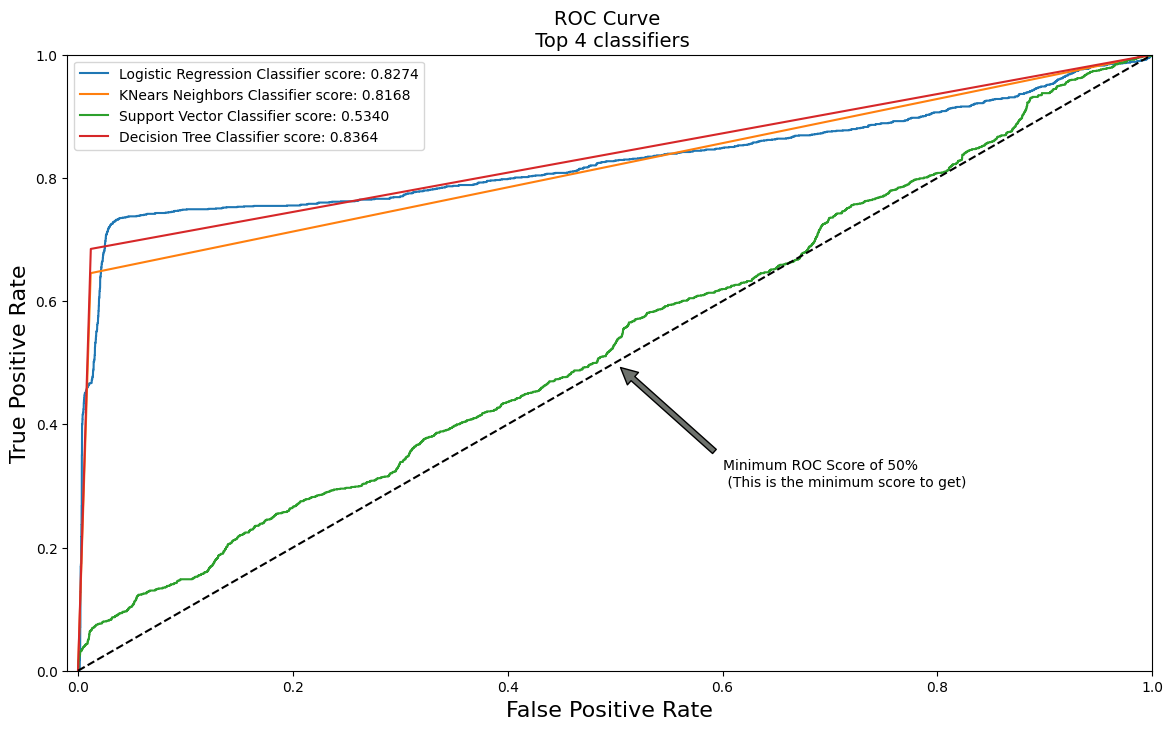

In [33]:
log_fpr, log_tpr, log_thresold = roc_curve(y_train, log_reg_pred)
knear_fpr, knear_tpr, knear_thresold = roc_curve(y_train, knears_pred)
svc_fpr, svc_tpr, svc_thresold = roc_curve(y_train, svc_pred)
DTC_fpr , DTC_tpr, DTC_thresold = roc_curve(y_train, DTC_pred)

def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, DTC_fpr, DTC_tpr):
    plt.figure(figsize=(14, 8))
    plt.title('ROC Curve \n Top 4 classifiers', fontsize=14)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier score: {:.4f}'.format(roc_auc_score(y_train, log_reg_pred)))
    plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier score: {:.4f}'.format(roc_auc_score(y_train, knears_pred)))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier score: {:.4f}'.format(roc_auc_score(y_train, svc_pred)))
    plt.plot(DTC_fpr, DTC_tpr, label='Decision Tree Classifier score: {:.4f}'.format(roc_auc_score(y_train, DTC_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                 arrowprops=dict(facecolor='#6E726D', shrink=0.05))
    plt.legend()
    #plt.grid(True, alpha=0.3)
    plt.show()
# call the function for showing graphic
graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, DTC_fpr, DTC_tpr)

Logistic Regression ROC Curve

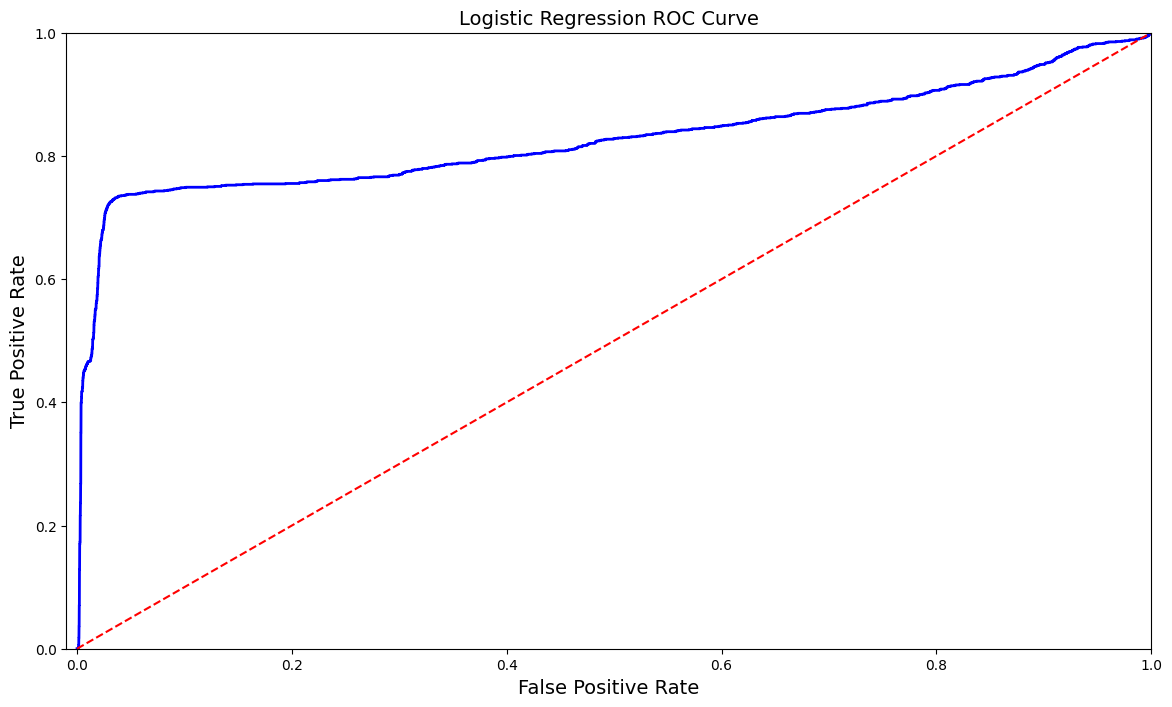

In [34]:
def logistic_roc_curve(log_fpr, log_tpr):
    plt.figure(figsize=(14, 8))
    plt.title('Logistic Regression ROC Curve', fontsize=14)
    plt.plot(log_fpr, log_tpr, 'b-', linewidth=2)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.ylabel('True Positive Rate', fontsize=14)
    plt.axis([-0.01, 1, 0, 1])
    plt.show()

# call the function for showing graphic
logistic_roc_curve(log_fpr, log_tpr)

Prove the dataset depend on overfitting vs how it should be look like

In [35]:
from sklearn.model_selection import StratifiedGroupKFold
from sklearn.datasets import load_iris

# build a data and model
X, y = load_iris(return_X_y=True)
#model = LogisticRegression(max_iter=500, random_state=42)

# Initiation list for saving score
undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []

# Cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for train_idx, test_idx in skf.split(X, y):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    log_reg_params_sample = {'penalty': ['l1', 'l2'],
                             'C': [0.01 , 0.1 , 1, 10, 100],
                             'solver': ['liblinear'],
                             'max_iter': [5000]}

    grid_log_reg_sample = GridSearchCV(LogisticRegression(), log_reg_params_sample, n_jobs=-1, cv=5)
    grid_log_reg_sample.fit(X_train, y_train)

    log_reg_sample = grid_log_reg_sample.best_estimator_

    log_reg_sample.fit(X_train, y_train)
    y_pred = log_reg_sample.predict(X_test)

    undersample_accuracy.append(accuracy_score(y_test, y_pred))
    undersample_precision.append(precision_score(y_test, y_pred, average='macro'))
    undersample_recall.append(recall_score(y_test, y_pred, average='macro'))
    undersample_f1.append(f1_score(y_test, y_pred, average='macro'))
    
# The result
print('Accuracy Score: {:.2f}'.format(np.mean(undersample_accuracy)))
print('Precision Score: {:.2f}'.format(np.mean(undersample_precision)))
print('Recall Score: {:.2f}'.format(np.mean(undersample_recall)))
print('F1 Score: {:.2f}'.format(np.mean(undersample_f1)))   

Accuracy Score: 0.95
Precision Score: 0.95
Recall Score: 0.95
F1 Score: 0.95


In [36]:
# Overfitting Case
X = df_axis.drop(['fraud'], axis=1)
y = df_axis['fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=None, test_size=0.2, stratify=y)

log_reg_params = {'penalty': ['l1', 'l2'],
                  'C': [0.01, 0.1, 1, 10, 100],
                  'solver': ['liblinear'],
                  'max_iter': [5000]
                  }

grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)

# find best estimator for logistic regression
log_reg_new = grid_log_reg.best_estimator_
log_reg_new

y_pred = log_reg_new.predict(X_test)

# Overfitting Case
print('Recall Score: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Precision Score: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('F1 Score: {:.2f}'.format(f1_score(y_test, y_pred, average='macro')))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_test, y_pred)))


Recall Score: 0.73
Precision Score: 0.89
F1 Score: 0.78
Accuracy Score: 0.92


In [37]:
from sklearn.metrics import average_precision_score

undersample_y_score = log_reg_new.decision_function(X_test)

undersample_average_precision = average_precision_score(y_test, undersample_y_score)
print('Average preicision-recall score: {0:0.2f}',format(undersample_average_precision))

Average preicision-recall score: {0:0.2f} 0.7173171827054731


Undersampling Precision-Recall Curve graphic

Average preicision-recall score: 0.717
------------------------------------------------------------------------------------------


Text(0.5, 1.0, 'Undersampling Precision-Recall curve: \n Average Precision-Recall Score = 0.717')

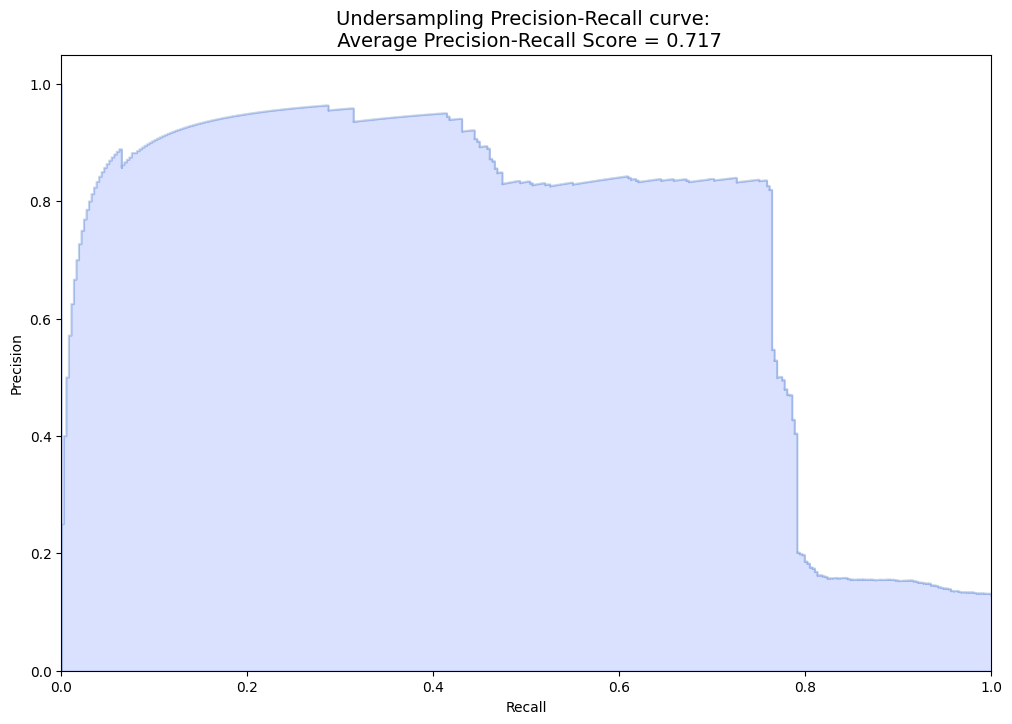

In [38]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 8))

precision, recall, _ = precision_recall_curve(y_test, undersample_y_score)

print('Average preicision-recall score: {:.3f}'.format(undersample_average_precision))
print('--'*45)
plt.step(recall, precision, color='#004a93', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='#486aff')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Undersampling Precision-Recall curve: \n Average Precision-Recall Score = {:.3f}'.format(undersample_average_precision), fontsize=14)

Build SMOTE Model

In [39]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline

# List to append the score and then find the average
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

X = df_axis.drop(['fraud'], axis=1)
y = df_axis['fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Classifier with optimal parameters
# log_reg_sm = logistic regression smote
log_reg_sm = LogisticRegression()

# build a params for logistic regression smote
log_reg_sm_params = {
    'penalty': ['l2'],
    'C': [0.1, 1, 10, 100, 1000]
}

rand_log_reg_sm = RandomizedSearchCV(LogisticRegression(), log_reg_sm_params, n_iter=4)

# make a function for sss split
for train, test in sss.split(X_train, y_train):
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_log_reg_sm)
    # SMOTE happens during Cross Validation not before
    model = pipeline.fit(X_train.iloc[train], y_train.iloc[train]) # make a model append [train] in X_train
    best_est = rand_log_reg_sm.best_estimator_
    prediction = best_est.predict(X_train.iloc[test]) # make a prediction with [test] in X_train

    accuracy_lst.append(pipeline.score(X_train.iloc[test], y_train.iloc[test]))
    precision_lst.append(precision_score(y_train.iloc[test], prediction))
    recall_lst.append(recall_score(y_train.iloc[test], prediction))
    f1_lst.append(f1_score(y_train.iloc[test], prediction))
    auc_lst.append(roc_auc_score(y_train.iloc[test], prediction))

print('Length of X (test): {} | Length of y (test): {}'.format(len(X_test), len(y_test)))
print('Length of X (train): {} | Length of y (train): {}'.format(len(X_train.iloc[train]), len(y_train.iloc[train])))
print('--' *45)
print('')
print('accuracy: {}'.format(np.mean(accuracy_lst)))
print('precision: {}'.format(np.mean(precision_lst)))
print('recall: {}'.format(np.mean(precision_lst)))
print('f1: {}'.format(np.mean(f1_lst)))
print('auc: {}'.format(np.mean(auc_lst)))
print('--' *45)

Length of X (test): 2889 | Length of y (test): 2889
Length of X (train): 8667 | Length of y (train): 8667
------------------------------------------------------------------------------------------

accuracy: 0.9182176171628175
precision: 0.6589436544117727
recall: 0.6589436544117727
f1: 0.6997406855858015
auc: 0.8448999730680536
------------------------------------------------------------------------------------------


In [40]:
from sklearn.metrics import classification_report

labels = ['No Fraud', 'Fraud']
smote_prediction = best_est.predict(X_test)
print(classification_report(y_test, smote_prediction, target_names=labels))

              precision    recall  f1-score   support

    No Fraud       0.96      0.95      0.96      2520
       Fraud       0.68      0.76      0.71       369

    accuracy                           0.92      2889
   macro avg       0.82      0.85      0.83      2889
weighted avg       0.93      0.92      0.92      2889



Confusion Matrix

In [41]:
import time
# SMOTE Technique (OverSampling) After splitting and Cross Validating
sm = SMOTE(sampling_strategy='minority', random_state=42)

# this is will be data we are going to
Xsm_train, ysm_train = sm.fit_resample(X_train, y_train) # change fit_sample with fit_resample cuz already deprecated

# Improve the score by 2% points approximately
t0 = time.time()
log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm.fit(Xsm_train, ysm_train)
t1 = time.time()
print('Fitting oversample data took :{} sec'.format(t1 - t0))

Fitting oversample data took :0.3004639148712158 sec


Test Data with Logistic Regression:

Confusion Matrix:
* Positive/Negative: Type of Class (label) ["No", "Yes"] True/False: Correctly or Incorrectly classified by the model.


* True Negatives (Top-Left Square): This is the number of correctly classifications of the "No" (No Fraud Detected) class.


* False Negatives (Top-Right Square): This is the number of incorrectly classifications of the "No"(No Fraud Detected) class.


* False Positives (Bottom-Left Square): This is the number of incorrectly classifications of the "Yes" (Fraud Detected) class


* True Positives (Bottom-Right Square): This is the number of correctly classifications of the "Yes" (Fraud Detected) class.

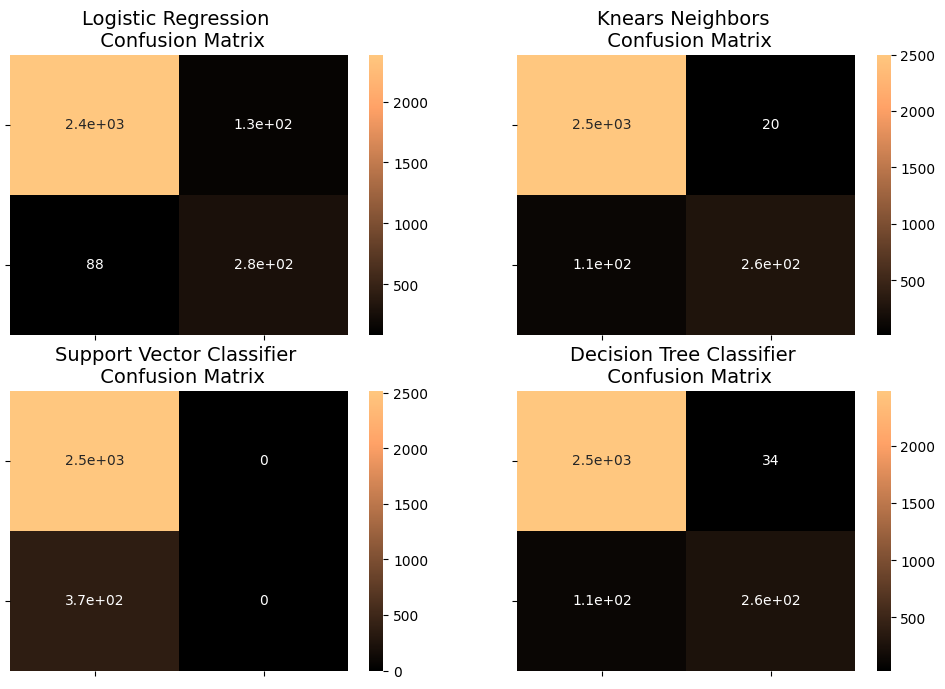

In [42]:
from sklearn.metrics import confusion_matrix

# Logistic regression fitted using SMOTE techqnique
y_pred_log_reg = log_reg_sm.predict(X_test)

# Other models fitted with UnderSampling
y_pred_knear = knears_neighbors.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_DTC = DTC_clf.predict(X_test)

log_reg_cf = confusion_matrix(y_test, y_pred_log_reg)
knears_cf = confusion_matrix(y_test, y_pred_knear)
svc_cf = confusion_matrix(y_test, y_pred_svc)
DTC_cf = confusion_matrix(y_test, y_pred_DTC)

fig, ax = plt.subplots(2, 2, figsize=(12, 8))

sns.heatmap(log_reg_cf, ax=ax[0][0], annot=True, cmap=plt.cm.copper)
ax[0][0].set_title('Logistic Regression \n Confusion Matrix', fontsize=14)
ax[0][0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0][0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(knears_cf, ax=ax[0][1], annot=True, cmap=plt.cm.copper)
ax[0][1].set_title('Knears Neighbors \n Confusion Matrix', fontsize=14)
ax[0][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(svc_cf, ax=ax[1][0], annot=True, cmap=plt.cm.copper)
ax[1][0].set_title('Support Vector Classifier \n Confusion Matrix', fontsize=14)
ax[1][0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(DTC_cf, ax=ax[1][1], annot=True, cmap=plt.cm.copper)
ax[1][1].set_title('Decision Tree Classifier \n Confusion Matrix', fontsize=14)
ax[1][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

plt.show()

In [43]:
from sklearn.metrics import classification_report

print('Logistic Regression Report:')
print(classification_report(y_test, y_pred_log_reg))

print('Knears Neighbors Report:')
print(classification_report(y_test, y_pred_knear))

print('Support Vector Classifier Report:')
print(classification_report(y_test, y_pred_svc))

print('Decision Tree Classifier Report:')
print(classification_report(y_test, y_pred_DTC))

Logistic Regression Report:
              precision    recall  f1-score   support

         0.0       0.96      0.95      0.96      2520
         1.0       0.68      0.76      0.72       369

    accuracy                           0.92      2889
   macro avg       0.82      0.85      0.84      2889
weighted avg       0.93      0.92      0.93      2889

Knears Neighbors Report:
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98      2520
         1.0       0.93      0.71      0.81       369

    accuracy                           0.96      2889
   macro avg       0.94      0.85      0.89      2889
weighted avg       0.96      0.96      0.95      2889

Support Vector Classifier Report:
              precision    recall  f1-score   support

         0.0       0.87      1.00      0.93      2520
         1.0       0.00      0.00      0.00       369

    accuracy                           0.87      2889
   macro avg       0.44      0.50      0.

In [44]:
y_pred_sm = best_est.predict(X_test)

In [45]:
# Final Score in the test set of logistics regression
from sklearn.metrics import accuracy_score

y_pred = log_reg.predict(X_train) # recall the log_reg // array
undersample_score = accuracy_score(y_train, y_pred)

# Logistic Regression with SMOTE Technique (Better accuracy with SMOTE t)
y_pred_sm = best_est.predict(X_test)
oversample_score = accuracy_score(y_test, y_pred_sm)

# build a technique model
d = {'Technique': ['Random Undersampling', 'Oversampling (SMOTE)'], 
     'Score': [undersample_score, oversample_score]}
final_df = pd.DataFrame(data=d) # callback a 'd' model for final_df

# Move column
score = final_df['Score'] # append 'Score' function for score callable
final_df.drop(['Score'], axis=1, inplace=True)
final_df.insert(1, 'Score', score)

# show the result
final_df

,Technique,Score
0,Random Undersampling,0.922025
1,Oversampling (SMOTE),0.922465


Neural Networks Testing Random UnderSampling Data vs OverSampling (SMOTE):

* In this section we will implement a simple Neural Network (with one hidden layer) in order to see which of the two logistic regressions models we implemented in the (undersample or oversample(SMOTE)) has a better accuracy for detecting fraud and non-fraud transactions.

Using Keras Model belong Neural Network for predicting the accuracy models

In [46]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

X = df_axis.drop(['fraud'], axis=1)
y = df_axis['fraud']

n_inputs = X_train.shape[1]

undersample_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

In [47]:
# rangkuman untuk undersample model
undersample_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 6)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 332 (1.30 KB)

 Trainable params: 332 (1.30 KB)

 Non-trainable params: 0 (0.00 B)

In [48]:
undersample_model.compile(Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [49]:
undersample_model.fit(X_train, y_train, 
                      validation_split=0.2, 
                      batch_size=100, 
                      epochs=20, 
                      shuffle=True, 
                      verbose=2)

Epoch 1/20
93/93 - 5s - 54ms/step - accuracy: 0.6151 - loss: 4588.0439 - val_accuracy: 0.8685 - val_loss: 177.5091
Epoch 2/20
93/93 - 1s - 9ms/step - accuracy: 0.8645 - loss: 54.1029 - val_accuracy: 0.9174 - val_loss: 36.8377
Epoch 3/20
93/93 - 1s - 12ms/step - accuracy: 0.8707 - loss: 56.9336 - val_accuracy: 0.9161 - val_loss: 24.2501
Epoch 4/20
93/93 - 2s - 16ms/step - accuracy: 0.8778 - loss: 54.3821 - val_accuracy: 0.9117 - val_loss: 11.8077
Epoch 5/20
93/93 - 1s - 14ms/step - accuracy: 0.8725 - loss: 72.8938 - val_accuracy: 0.7049 - val_loss: 35.9416
Epoch 6/20
93/93 - 2s - 18ms/step - accuracy: 0.8685 - loss: 64.4006 - val_accuracy: 0.9087 - val_loss: 294.9565
Epoch 7/20
93/93 - 1s - 14ms/step - accuracy: 0.8635 - loss: 127.0772 - val_accuracy: 0.9208 - val_loss: 53.5343
Epoch 8/20
93/93 - 1s - 15ms/step - accuracy: 0.8549 - loss: 137.4201 - val_accuracy: 0.9113 - val_loss: 64.2890
Epoch 9/20
93/93 - 1s - 16ms/step - accuracy: 0.8645 - loss: 56.1521 - val_accuracy: 0.9161 - val_l

In [50]:
# build a model fraud predictions
undersample_fraud_predictions = undersample_model.predict(X_test, batch_size=200, verbose=0)
undersample_fraud_predictions

array([[1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 6.8788501e-23],
       [0.0000000e+00, 1.0000000e+00],
       ...,
       [9.8589104e-01, 1.4108976e-02],
       [9.3515640e-01, 6.4843595e-02],
       [1.0000000e+00, 2.8384702e-25]], shape=(2889, 2), dtype=float32)

In [51]:
# build a array model fraud predictions
undersample_fraud_predictions_binary = np.argmax(undersample_fraud_predictions, axis=1)
undersample_fraud_predictions_binary

array([0, 0, 1, ..., 0, 0, 0], shape=(2889,))

In [52]:
# change the binary y_test data into array y_test belong to y_array
y_array = np.array(y_test)
y_array

array([0., 0., 1., ..., 1., 0., 0.], shape=(2889,))

In [53]:
import itertools

# Create a confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print('Normalized Confusion Matrix')
    else:
        print('Confusion matrix, without normalization')

        print(cm)

        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title, fontsize=14)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)

        # format
        fmt = '.2f' if normalize else 'd'
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, format(cm[i, j], fmt),
            horizontalalignment = 'center',
            color='white' if cm[i, j] > thresh else 'black')
        
        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted Label')

Confusion matrix, without normalization
[[2451   69]
 [ 188  181]]
Confusion matrix, without normalization
[[2520    0]
 [   0  369]]


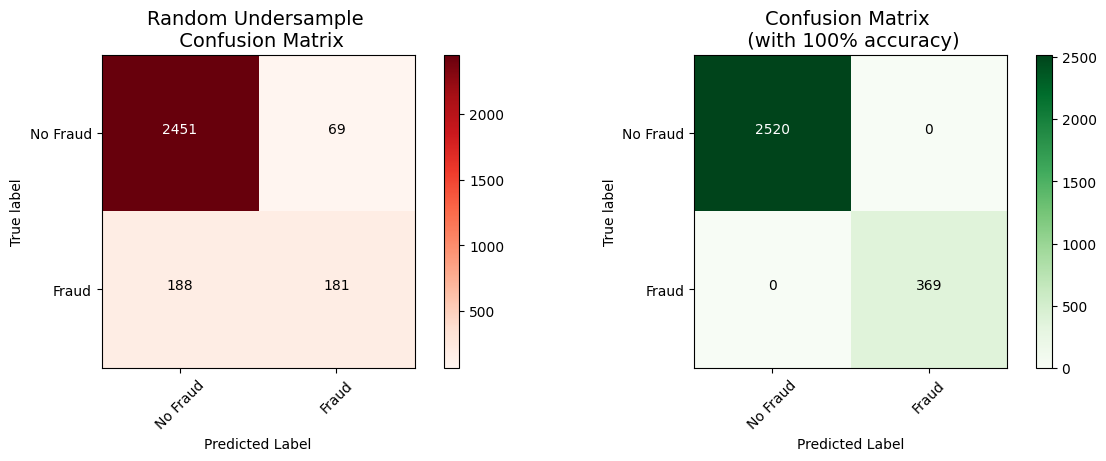

In [54]:
# build confusion matrix graphic
undersample_cm = confusion_matrix(y_array, undersample_fraud_predictions_binary)
actual_cm = confusion_matrix(y_array, y_array)
labels = ['No Fraud', 'Fraud']

fig = plt.figure(figsize=(12, 8))

fig.add_subplot(221)
plot_confusion_matrix(undersample_cm, labels, title='Random Undersample \n Confusion Matrix', cmap=plt.cm.Reds)

fig.add_subplot(222)
plot_confusion_matrix(actual_cm, labels, title='Confusion Matrix \n (with 100% accuracy)', cmap=plt.cm.Greens)

Keras || Oversampling (SMOTE)

In [55]:
# build a function for XSM through SMOTE

n_inputs = Xsm_train.shape[1]

oversample_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

In [56]:
# call a function with adam
oversample_model.compile(Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy',
                         metrics=['accuracy'])

In [57]:
# Train a model
oversample_model.fit(Xsm_train, ysm_train, 
                     validation_split=0.2, 
                     batch_size=100, 
                     epochs=20, 
                     shuffle=True, 
                     verbose=2)

Epoch 1/20


162/162 - 14s - 89ms/step - accuracy: 0.7344 - loss: 274.6291 - val_accuracy: 0.6054 - val_loss: 84.0554
Epoch 2/20
162/162 - 1s - 6ms/step - accuracy: 0.7571 - loss: 55.0618 - val_accuracy: 0.5330 - val_loss: 367.2700
Epoch 3/20
162/162 - 1s - 5ms/step - accuracy: 0.7534 - loss: 83.1908 - val_accuracy: 0.6806 - val_loss: 15.1484
Epoch 4/20
162/162 - 1s - 7ms/step - accuracy: 0.7589 - loss: 78.0323 - val_accuracy: 0.5476 - val_loss: 154.0238
Epoch 5/20
162/162 - 1s - 6ms/step - accuracy: 0.7563 - loss: 83.0992 - val_accuracy: 0.5744 - val_loss: 187.3651
Epoch 6/20
162/162 - 1s - 5ms/step - accuracy: 0.7597 - loss: 39.1539 - val_accuracy: 0.8284 - val_loss: 1.9450
Epoch 7/20
162/162 - 1s - 5ms/step - accuracy: 0.7512 - loss: 45.4944 - val_accuracy: 0.6297 - val_loss: 78.7402
Epoch 8/20
162/162 - 1s - 8ms/step - accuracy: 0.7388 - loss: 86.1920 - val_accuracy: 0.4683 - val_loss: 310.4092
Epoch 9/20
162/162 - 1s - 6ms/step - accuracy: 0.7429 - loss: 64.0060 - val_accuracy: 0.5035 - val_lo

In [58]:
# call oversample_predictions through oversample_model.predict()
oversample_fraud_predictions = oversample_model.predict(X_test, batch_size=100, verbose=0)

In [59]:
# makeover data from 2d to 1d for oversample_fraud_predictions
oversample_fraud_predictions_1d = np.argmax(oversample_fraud_predictions, axis=1)
oversample_fraud_predictions_1d

array([0, 0, 1, ..., 1, 0, 0], shape=(2889,))

In [60]:
test_accuracy_fraud = accuracy_score(oversample_fraud_predictions_1d, y_test)
test_precision_fraud = precision_score(oversample_fraud_predictions_1d, y_test)
test_recall_fraud = recall_score(oversample_fraud_predictions_1d, y_test)
test_f1_fraud = f1_score(oversample_fraud_predictions_1d, y_test)
test_roc_auc_fraud = roc_auc_score(oversample_fraud_predictions_1d, y_test)

print('the result for test_accuracy_fraud:', (test_accuracy_fraud))
print('the result for test_precision_fraud:', (test_precision_fraud))
print('the result for test_recall_fraud:', (test_recall_fraud))
print('the result for test_f1_fraud:', (test_f1_fraud))
print('the result for test_roc_auc_fraud:', (test_roc_auc_fraud))

the result for test_accuracy_fraud: 0.9176185531325718
the result for test_precision_fraud: 0.6937669376693767
the result for test_recall_fraud: 0.6719160104986877
the result for test_f1_fraud: 0.6826666666666666
the result for test_roc_auc_fraud: 0.8134300945635384


Confusion matrix, without normalization
[[2395  125]
 [ 113  256]]
Confusion matrix, without normalization
[[2520    0]
 [   0  369]]


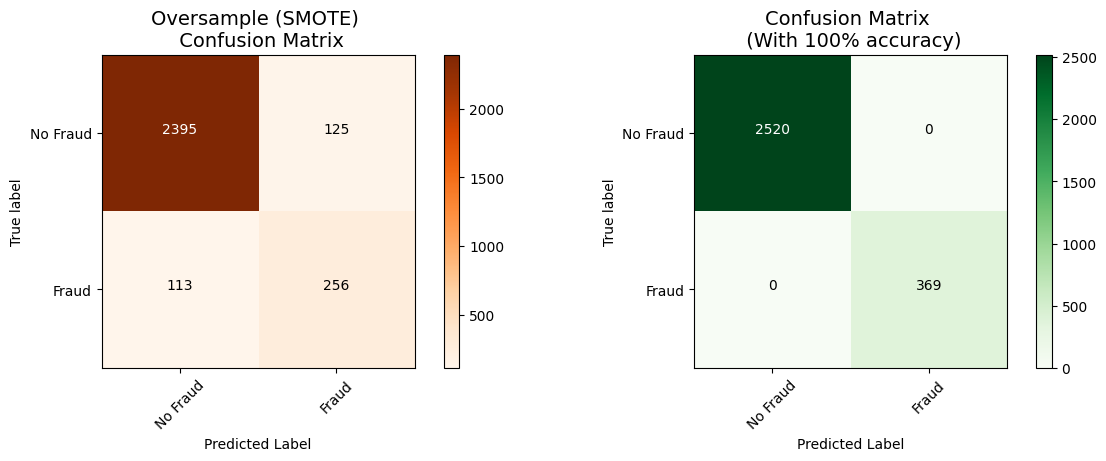

In [61]:
oversample_smote = confusion_matrix(y_array, oversample_fraud_predictions_1d)
actual_cm = confusion_matrix(y_array, y_array)
labels = ['No Fraud', 'Fraud']

fig = plt.figure(figsize=(12, 8))

fig.add_subplot(221)
plot_confusion_matrix(oversample_smote, labels, title='Oversample (SMOTE) \n Confusion Matrix', cmap=plt.cm.Oranges)

fig.add_subplot(222)
plot_confusion_matrix(actual_cm, labels, title='Confusion Matrix \n (With 100% accuracy)', cmap=plt.cm.Greens)

Conclusion:

* Implementing SMOTE on our imbalanced dataset helped us with the imbalance of our labels (more no fraud than fraud transactions). Nevertheless, I still have to state that sometimes the neural network on the oversampled dataset predicts less correct fraud transactions than our model using the undersample dataset. However, remember that the removal of outliers was implemented only on the random undersample dataset and not on the oversampled one. Also, in our undersample data our model is unable to detect for a large number of cases non fraud transactions correctly and instead, misclassifies those non fraud transactions as fraud cases. Imagine that people that were making regular purchases got their card blocked due to the reason that our model classified that transaction as a fraud transaction, this will be a huge disadvantage for the financial institution. The number of customer complaints and customer disatisfaction will increase. The next step of this analysis will be to do an outlier removal on our oversample dataset and see if our accuracy in the test set improves.


* Note: One last thing, predictions and accuracies may be subjected to change since I implemented data shuffling on both types of dataframes. The main thing is to see if our models are able to correctly classify no fraud and fraud transactions.

Save and load file into dill

In [62]:
import dill

# Variabel penting untuk machine learning
important_vars = {
    'X': X,
    'y': y,
    'X_train': X_train,
    'X_test': X_test, 
    'y_train': y_train,
    'y_test': y_test,
    'Xsm_train': Xsm_train,
    'ysm_train': ysm_train,
    'df': df,
    'df_axis': df_axis,
    'GridSearchCV': GridSearchCV,
    'KNeighborsClassifier': KNeighborsClassifier,
    'LogisticRegression': LogisticRegression,
    'RandomizedSearchCV': RandomizedSearchCV,
    'SMOTE': SMOTE,
    'SVC': SVC,
    'Sequential': Sequential,
    'sss': sss,
    'pipeline': pipeline,
    'fraud_data': fraud_data,
    'nofraud_data': nofraud_data,
    'log_reg': log_reg,
    'svc': svc,
    'DTC_clf': DTC_clf,
    'knears_neighbors': knears_neighbors,  # jika ada
    'accuracy_lst': accuracy_lst,
    'precision_lst': precision_lst,
    'recall_lst': recall_lst,
    'f1_lst': f1_lst,
    'sm': sm,
    'log_reg_sm': log_reg_sm,
    'oversample_model': oversample_model,
    'undersample_model': undersample_model
}

# Simpan
with open('ml_analysis_fraud.dill', 'wb') as f:
        dill.dump(important_vars, f)

In [63]:
# Load
with open('ml_analysis_fraud.dill', 'rb') as f:
    ml_data = dill.load(f)

print('file bisa di akses:', {len(ml_data)})

file bisa di akses: {33}


In [64]:
try:
    with open('ml_analysis_fraud.dill', 'rb') as f:
        ml_data = dill.load(f)

    print(f'Berhasil di load {len(ml_data)} nama variable')

    # tampilkan beberapa variable pertama
    print('Contoh variables:')
    for i, var_name in enumerate(ml_data):
        print(f'{i+1}. {var_name}')

except FileNotFoundError:
    print('File tidak ditemukan!')
except Exception as e:
    print(f'Error saat loading: {e}')

Berhasil di load 33 nama variable
Contoh variables:
1. X
2. y
3. X_train
4. X_test
5. y_train
6. y_test
7. Xsm_train
8. ysm_train
9. df
10. df_axis
11. GridSearchCV
12. KNeighborsClassifier
13. LogisticRegression
14. RandomizedSearchCV
15. SMOTE
16. SVC
17. Sequential
18. sss
19. pipeline
20. fraud_data
21. nofraud_data
22. log_reg
23. svc
24. DTC_clf
25. knears_neighbors
26. accuracy_lst
27. precision_lst
28. recall_lst
29. f1_lst
30. sm
31. log_reg_sm
32. oversample_model
33. undersample_model
